## Download SSH

- from https://data.marine.copernicus.eu/product/IBI_MULTIYEAR_PHY_005_002/description
- username: ise.korte@gmx.de
- password: $**M*****$

In [ ]:
# import packages
import copernicusmarine
import xarray as xr

In [ ]:
# set parameters
data_request = {
   "IBI_MULTIYEAR_PHY_005_002" : "cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m",
   "longitude" : [-19, -5], 
   "latitude" : [35, 45],
   "time" : ["1993-01-01", "2021-12-28"],
   "variables" : ["zos", "thetao", "uo", "vo"]
}

# load xarray dataset
ds = copernicusmarine.open_dataset(
    dataset_id = data_request["IBI_MULTIYEAR_PHY_005_002"],
    minimum_longitude = data_request["longitude"][0],
    maximum_longitude = data_request["longitude"][1],
    minimum_latitude = data_request["latitude"][0],
    maximum_latitude = data_request["latitude"][1],
    start_datetime = data_request["time"][0],
    end_datetime = data_request["time"][1],
    variables = data_request["variables"]
)

# show ds
ds

/Users/marie-louisekorte/miniconda3/envs/IbUpPy3.9.12/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching catalog: 100%|███████████████████████████| 3/3 [01:25<00:00, 28.38s/it]


INFO - 2024-05-24T13:11:15Z - Dataset version was not specified, the latest one was selected: "202012"
INFO - 2024-05-24T13:11:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-05-24T13:11:21Z - Service was not specified, the default one was selected: "arco-time-series"
username:

  ise.korte@gmx.de


password:

  ········


<xarray.Dataset> Size: 262GB
Dimensions:    (depth: 50, latitude: 121, longitude: 169, time: 10589)
Coordinates:
  * depth      (depth) float32 200B 0.5058 1.556 2.668 ... 5.292e+03 5.698e+03
  * latitude   (latitude) float32 484B 35.0 35.08 35.17 ... 44.83 44.92 45.0
  * longitude  (longitude) float32 676B -19.0 -18.92 -18.83 ... -5.083 -5.0
  * time       (time) datetime64[ns] 85kB 1993-01-01 1993-01-02 ... 2021-12-28
Data variables:
    zos        (time, latitude, longitude) float64 2GB ...
    thetao     (time, depth, latitude, longitude) float64 87GB ...
    uo         (time, depth, latitude, longitude) float64 87GB ...
    vo         (time, depth, latitude, longitude) float64 87GB ...
Attributes: (12/19)
    Conventions:    CF-1.0
    bulletin_date:  2020-12-01
    bulletin_type:  Reanalysis
    contact:        mailto: servicedesk.cmems@mercator-ocean.eu
    domain_name:    IBI12
    easting:        longitude
    ...             ...
    northing:       latitude
    references:     http://marine.copernicus.eu
    source:         CMEMS IBI-MFC
    title:          CMEMS IBI REANALYSIS: DAILY PHYSICAL PRODUCTS 
    z_max:          5698.061f
    z_min:          0.50576f

In [19]:
## save ds (only zos aka SSH because everything else doesn't seem to work ... or maybe it just takes forever)
ds_ssh = ds.zos
ds_ssh.to_netcdf("../Data.nosync/SSH.nc")

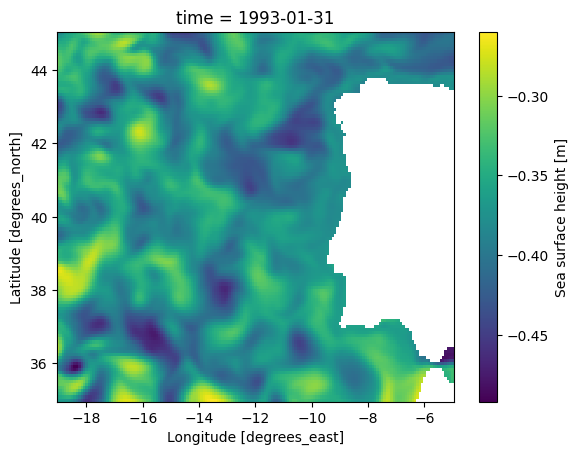

In [20]:
ds.zos.isel(time = 30).plot()

In [ ]:
## other code of copernicus marine ... gives me problems with the log in authenitification
import copernicusmarine as cm

cm.subset(
  dataset_id="cmems_mod_ibi_phy_my_0.083deg-2D_PT1H-m",
  dataset_version="202012",
  variables=["thetao", "uo", "vo", "zos"],
  minimum_longitude=-19,
  maximum_longitude=-5,
  minimum_latitude=35,
  maximum_latitude=45,
  start_datetime="1993-01-01T23:00:00",
  end_datetime="2021-12-28T23:00:00",
)